![Liver Disease Analysis](liver_analysis.jpeg)

## Import library

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split



from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

import warnings as wn
wn.filterwarnings(action='ignore')

## Data import

In [2]:
df=pd.read_csv("C://Users//Admin//Documents//Guvi//MDTM38//project//Disease_pre//liver//indian_liver_patient.csv")
pd.set_option("display.max_columns", None)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


## Data Cleaning

In [4]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns

Index(['age', 'gender', 'total_bilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'total_protiens', 'albumin',
       'albumin_and_globulin_ratio', 'dataset'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   total_bilirubin             583 non-null    float64
 3   direct_bilirubin            583 non-null    float64
 4   alkaline_phosphotase        583 non-null    int64  
 5   alamine_aminotransferase    583 non-null    int64  
 6   aspartate_aminotransferase  583 non-null    int64  
 7   total_protiens              583 non-null    float64
 8   albumin                     583 non-null    float64
 9   albumin_and_globulin_ratio  579 non-null    float64
 10  dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
df.shape

(583, 11)

In [7]:
print(df.duplicated().sum())

13


In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(570, 11)

In [10]:
df.isnull().sum()

age                           0
gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    4
dataset                       0
dtype: int64

In [11]:
df.describe(include="all")

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset
count,570.000000,570,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.849123,NaN,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,1.287719
std,16.242182,NaN,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,2.000000


<Axes: >

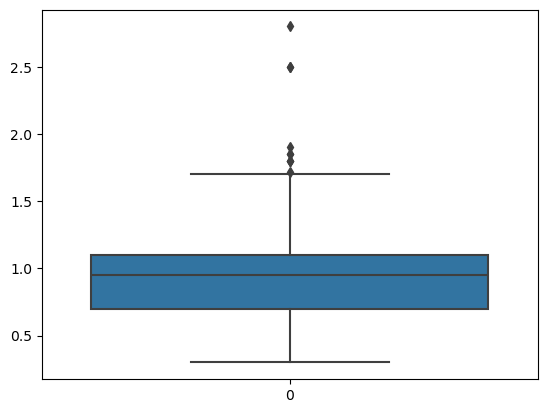

In [12]:
sns.boxplot(df["albumin_and_globulin_ratio"])

<Figure size 800x500 with 0 Axes>

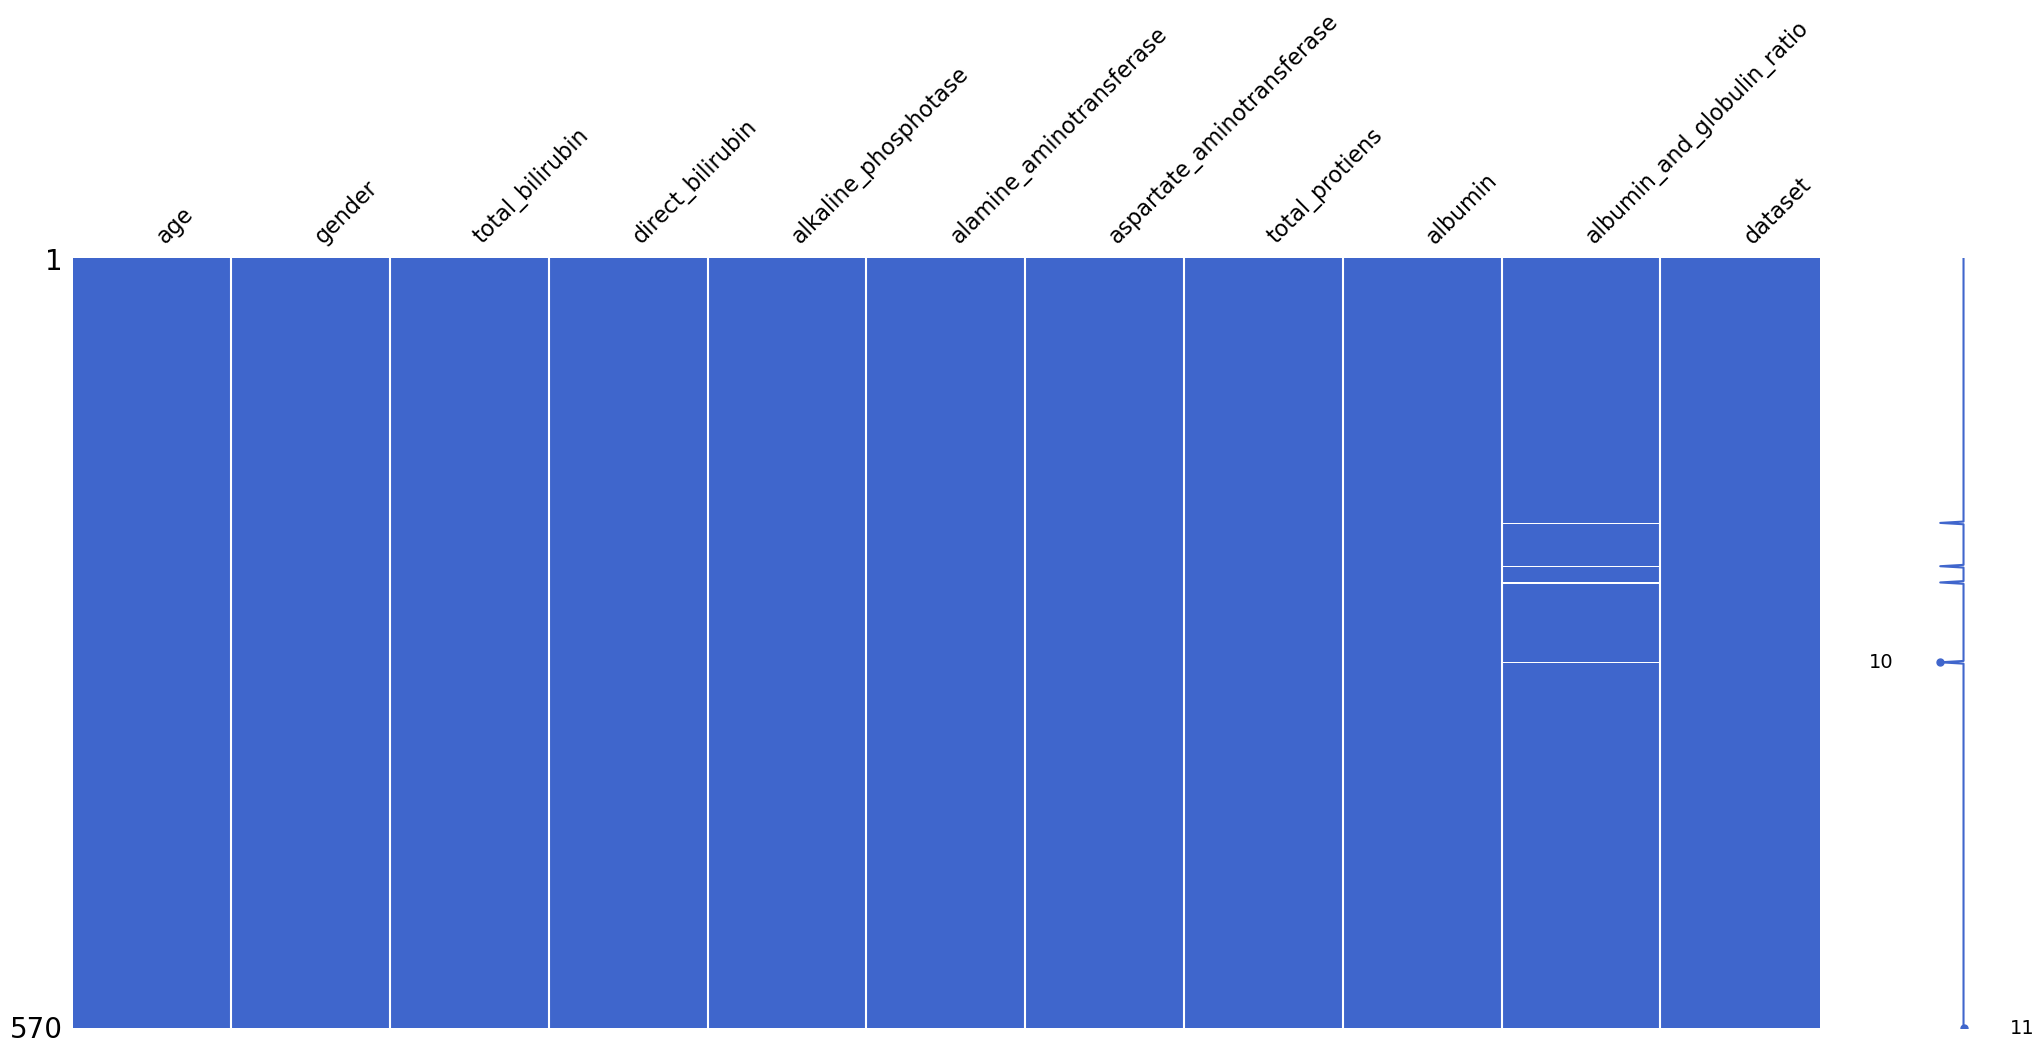

In [13]:
import missingno as msno
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
msno.matrix(df, sparkline=True, color=(0.25, 0.4, 0.8))  
plt.show()

In [14]:
df['albumin_and_globulin_ratio'].mean()

0.9480035335689044

In [15]:
df["albumin_and_globulin_ratio"].median()

0.95

In [16]:
df['albumin_and_globulin_ratio'] = df['albumin_and_globulin_ratio'].fillna(0.948003)

In [17]:
df.isnull().sum()

age                           0
gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    0
dataset                       0
dtype: int64

In [18]:
assert pd.notnull(df).all().all()

In [19]:
assert pd.notnull(df.select_dtypes(include=["number"])).all().all()

## EDA

In [20]:
print(df["dataset"].value_counts()) ## imbalanced data so go for precision, recall and f1 score

dataset
1    406
2    164
Name: count, dtype: int64


Text(0.5, 1.0, 'Liver Disease')

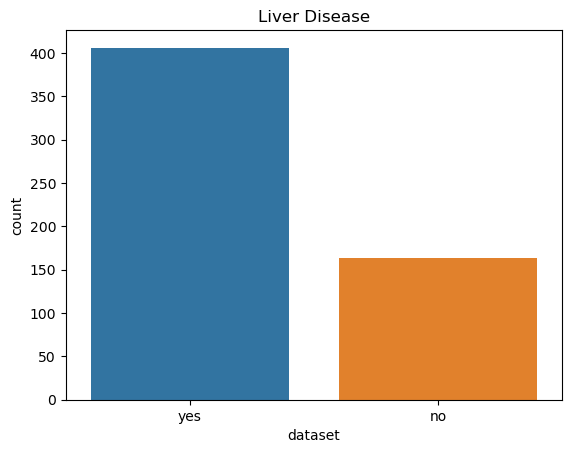

In [21]:
ax = sns.countplot(data=df, x="dataset")
ax.set_xticklabels(["yes", "no"])
plt.title("Liver Disease")


### Univariate analysis

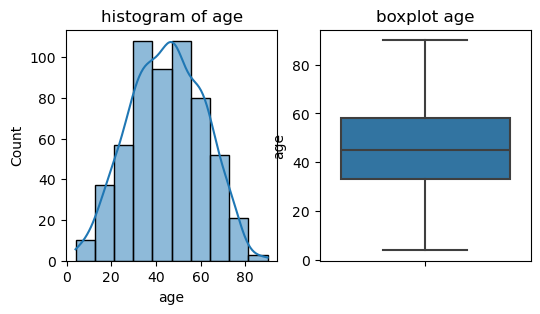

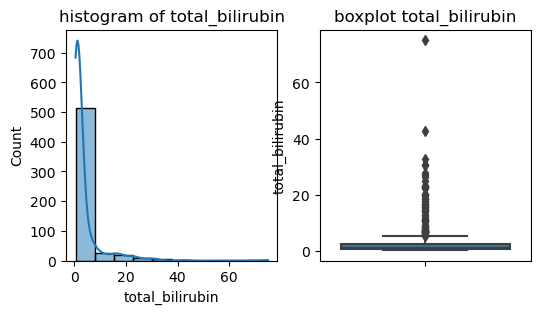

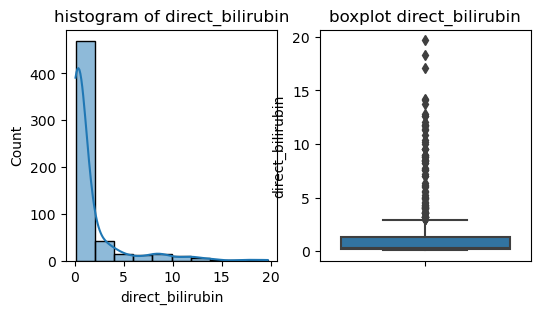

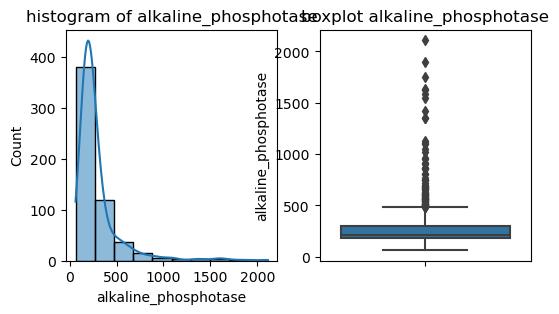

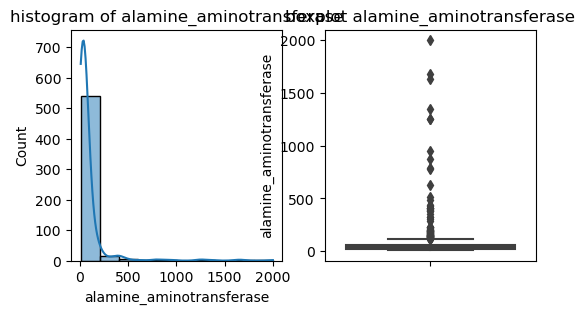

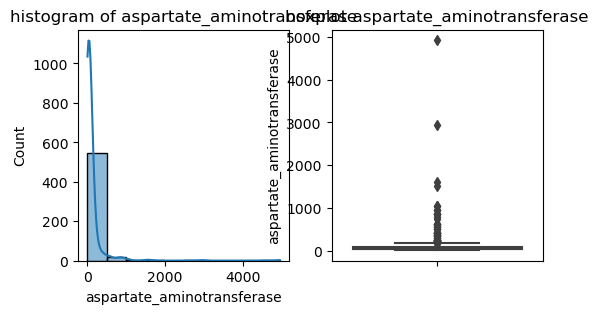

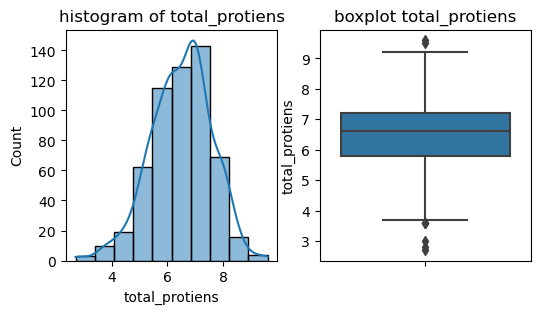

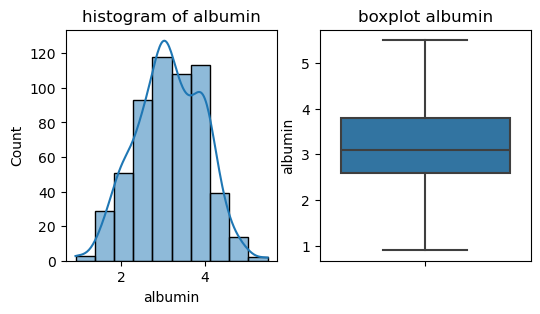

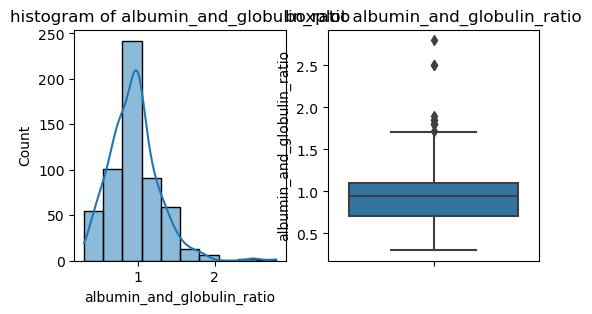

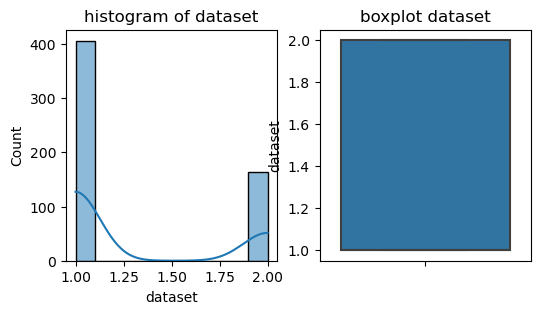

In [22]:
num_features=df.select_dtypes(include=["int64","float64"]).columns

for col in num_features:
    plt.figure(figsize=(6,3))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"histogram of {col}")
    
    plt.subplot(1,2,2)
    sns.boxplot(y=df[col])
    plt.title(f"boxplot {col}")
    plt.show()

### Bivariate analysis

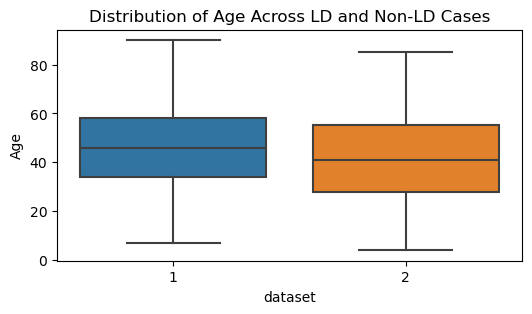

In [23]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='dataset', y='age', data=df)
plt.title('Distribution of Age Across LD and Non-LD Cases')
plt.xlabel('dataset')
plt.ylabel('Age')
plt.show()

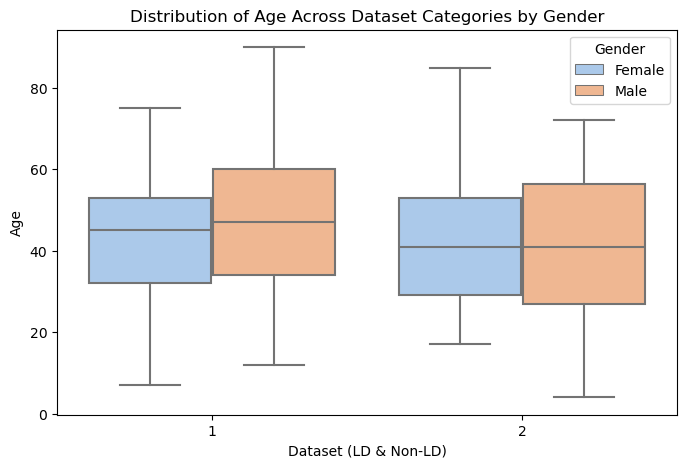

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='dataset', y='age', hue='gender', data=df, palette='pastel')

plt.title('Distribution of Age Across Dataset Categories by Gender')
plt.xlabel('Dataset (LD & Non-LD)')
plt.ylabel('Age')
plt.legend(title="Gender") 
plt.show()

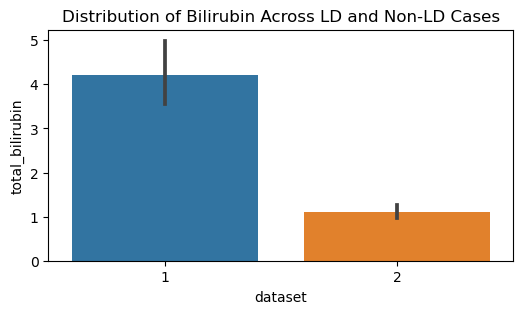

In [25]:
plt.figure(figsize=(6, 3))
sns.barplot(x='dataset', y='total_bilirubin', data=df)
plt.title('Distribution of Bilirubin Across LD and Non-LD Cases')
plt.xlabel('dataset')
plt.ylabel('total_bilirubin')
plt.show()

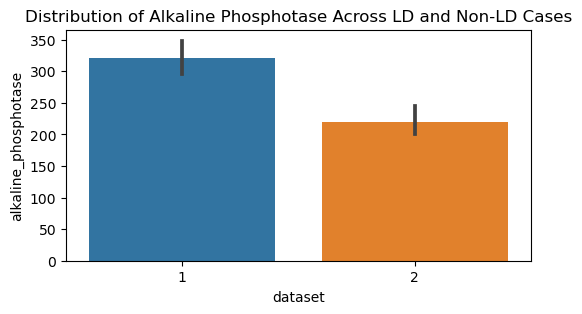

In [26]:
plt.figure(figsize=(6, 3))
sns.barplot(x='dataset', y='alkaline_phosphotase', data=df)
plt.title("Distribution of Alkaline Phosphotase Across LD and Non-LD Cases")
plt.xlabel('dataset')
plt.ylabel('alkaline_phosphotase')
plt.show()

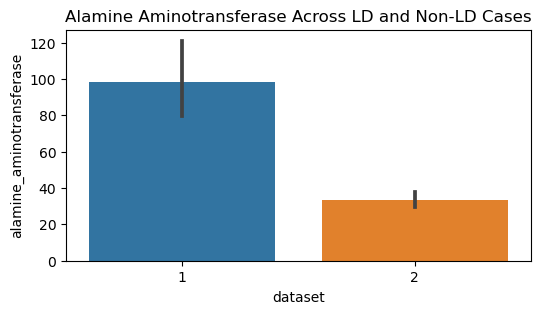

In [27]:
plt.figure(figsize=(6, 3))
sns.barplot(x='dataset', y='alamine_aminotransferase', data=df)
plt.title("Alamine Aminotransferase Across LD and Non-LD Cases")
plt.xlabel('dataset')
plt.ylabel('alamine_aminotransferase')
plt.show()

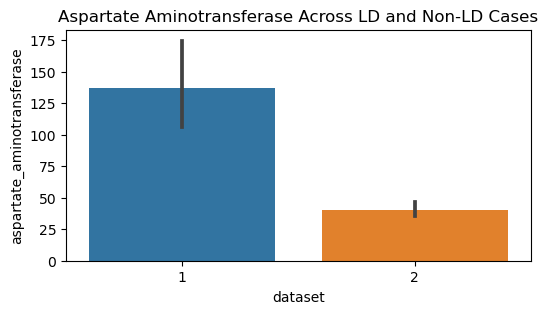

In [28]:
plt.figure(figsize=(6, 3))
sns.barplot(x='dataset', y='aspartate_aminotransferase', data=df)
plt.title("Aspartate Aminotransferase Across LD and Non-LD Cases")
plt.xlabel('dataset')
plt.ylabel('aspartate_aminotransferase')
plt.show()

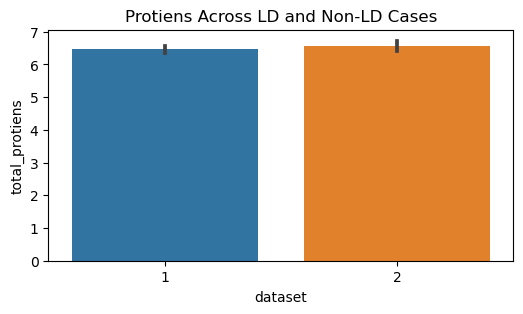

In [29]:
plt.figure(figsize=(6, 3))
sns.barplot(x='dataset', y='total_protiens', data=df)
plt.title("Protiens Across LD and Non-LD Cases")
plt.xlabel('dataset')
plt.ylabel('total_protiens')
plt.show()

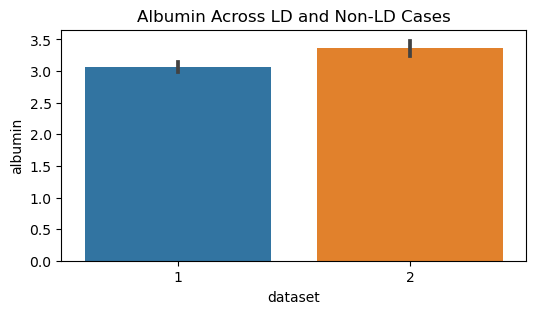

In [30]:
plt.figure(figsize=(6, 3))
sns.barplot(x='dataset', y='albumin', data=df)
plt.title("Albumin Across LD and Non-LD Cases")
plt.xlabel('dataset')
plt.ylabel('albumin')
plt.show()

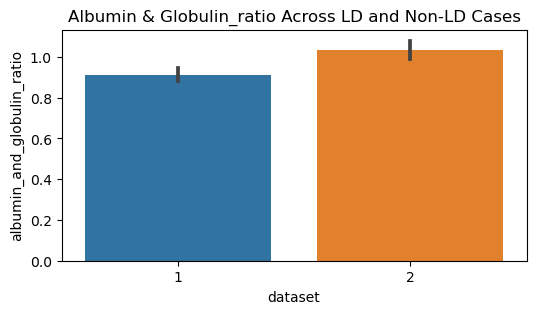

In [31]:
plt.figure(figsize=(6, 3))
sns.barplot(x='dataset', y='albumin_and_globulin_ratio', data=df)
plt.title("Albumin & Globulin_ratio Across LD and Non-LD Cases")
plt.xlabel('dataset')
plt.ylabel('albumin_and_globulin_ratio')
plt.show()

## Encoding

### LabelEncoder

In [32]:
# 1 => liver disease (LD)
# 0 => no liver disease (NLD)
print("before")
print(df["dataset"].value_counts())
print("after")
df['dataset'] = df['dataset'].replace(2, 0)
print(df["dataset"].value_counts())

before
dataset
1    406
2    164
Name: count, dtype: int64
after
dataset
1    406
0    164
Name: count, dtype: int64


In [33]:
encoder = LabelEncoder()

# Encoding feature columns
df['gender'] = encoder.fit_transform(df['gender'])

In [34]:
df["dataset"].value_counts()  ## 1= liver, 0=no liver

dataset
1    406
0    164
Name: count, dtype: int64

## Feature selection & Multivariate Analysis

In [35]:
df.corr()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset
age,1.000000,0.058237,0.011500,0.007050,0.081673,-0.083383,-0.016753,-0.197052,-0.271170,-0.215640,0.138093
gender,0.058237,1.000000,0.090298,0.101730,-0.023014,0.084317,0.081497,-0.085895,-0.091369,-0.005578,0.078501
total_bilirubin,0.011500,0.090298,1.000000,0.874116,0.206239,0.217471,0.238678,-0.008588,-0.224124,-0.207629,0.224430
direct_bilirubin,0.007050,0.101730,0.874116,1.000000,0.234609,0.237450,0.258489,-0.000875,-0.230751,-0.201394,0.250666
alkaline_phosphotase,0.081673,-0.023014,0.206239,0.234609,1.000000,0.126830,0.167230,-0.030048,-0.168318,-0.236037,0.187560
alamine_aminotransferase,-0.083383,0.084317,0.217471,0.237450,0.126830,1.000000,0.791857,-0.035193,-0.027973,-0.006523,0.161917
aspartate_aminotransferase,-0.016753,0.081497,0.238678,0.258489,0.167230,0.791857,1.000000,-0.022000,-0.085180,-0.072882,0.151101
total_protiens,-0.197052,-0.085895,-0.008588,-0.000875,-0.030048,-0.035193,-0.022000,1.000000,0.784731,0.233580,-0.037794
albumin,-0.271170,-0.091369,-0.224124,-0.230751,-0.168318,-0.027973,-0.085180,0.784731,1.000000,0.684099,-0.166835
albumin_and_globulin_ratio,-0.215640,-0.005578,-0.207629,-0.201394,-0.236037,-0.006523,-0.072882,0.233580,0.684099,1.000000,-0.170533


In [36]:
print(df.corr()['dataset'].abs().sort_values(ascending=False))

dataset                       1.000000
direct_bilirubin              0.250666
total_bilirubin               0.224430
alkaline_phosphotase          0.187560
albumin_and_globulin_ratio    0.170533
albumin                       0.166835
alamine_aminotransferase      0.161917
aspartate_aminotransferase    0.151101
age                           0.138093
gender                        0.078501
total_protiens                0.037794
Name: dataset, dtype: float64


<Axes: >

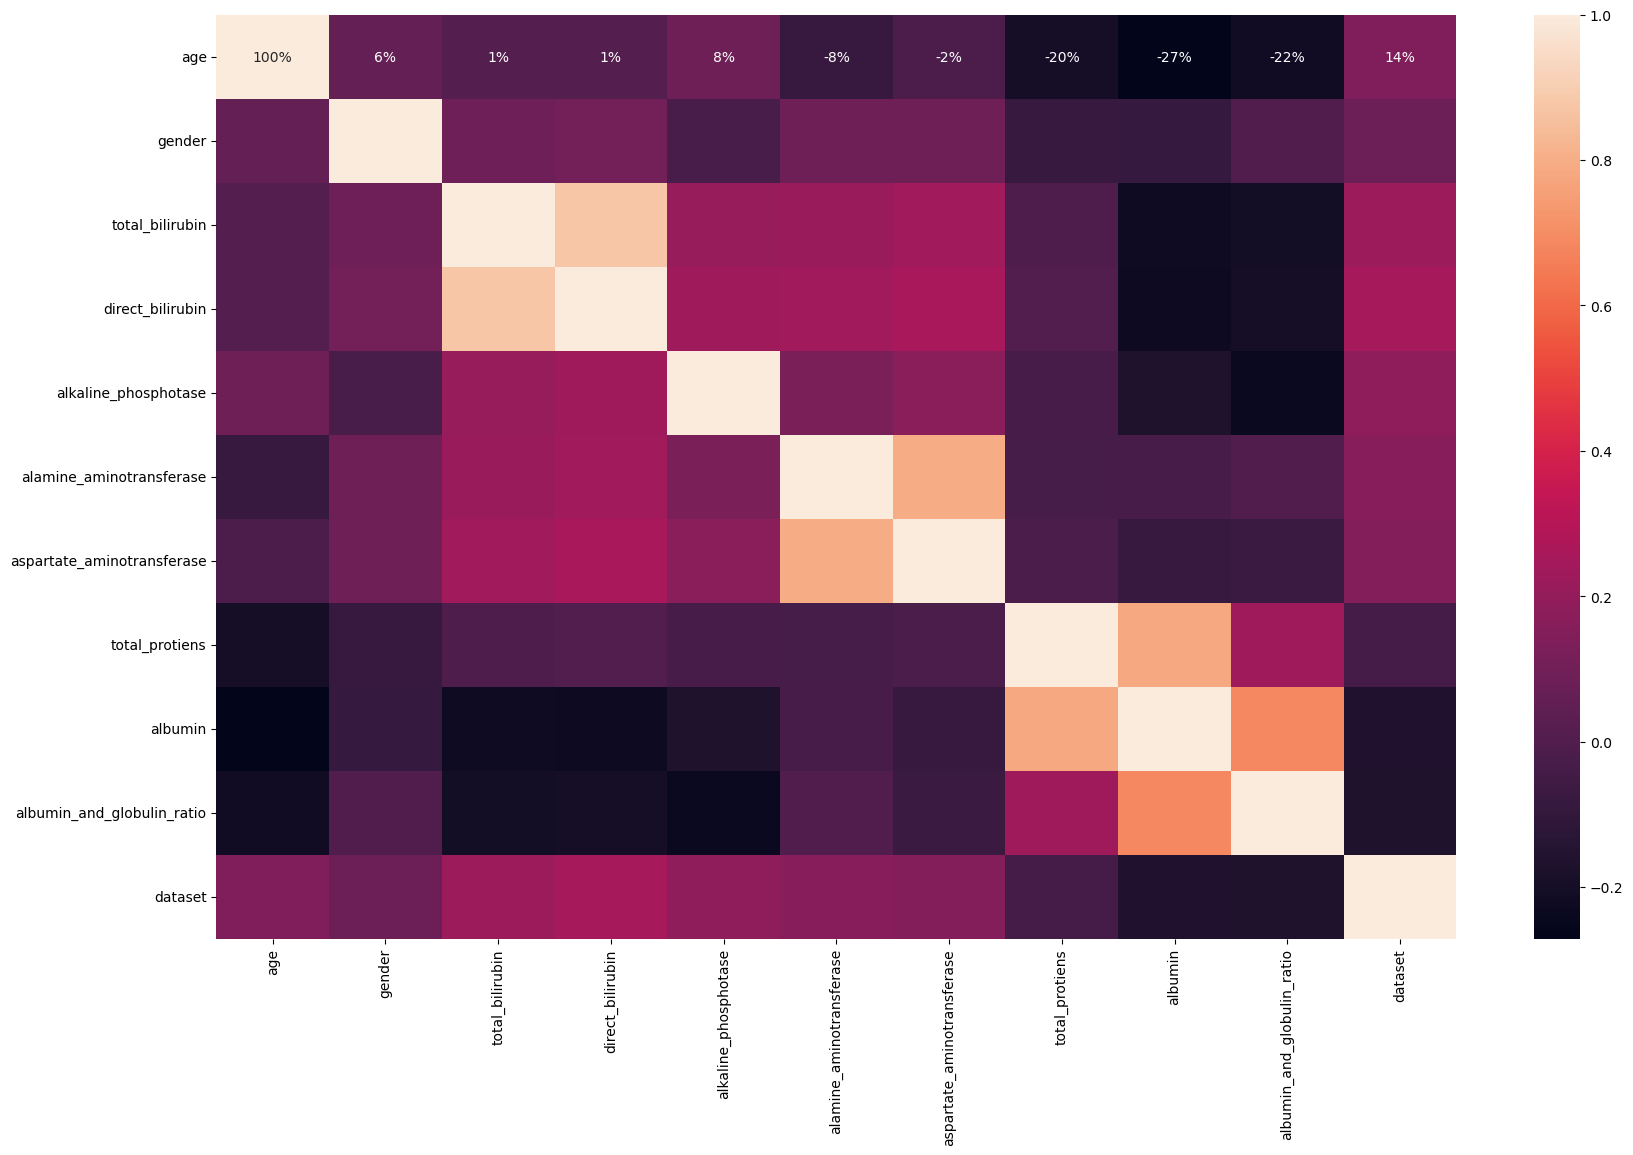

In [37]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [38]:
# Direct Bilirubin and total_bilirubin (0.874116) so drop since multicollinearity
# Alamine Aminotransferase & Aspartate Aminotransferase (0.791857) so drop since multicollinearity
# Albumin & Total Protiens (0.794731) so drop since multicollinearity

df=df.drop(columns=["direct_bilirubin","aspartate_aminotransferase","total_protiens"])
df.head()

,age,gender,total_bilirubin,alkaline_phosphotase,alamine_aminotransferase,albumin,albumin_and_globulin_ratio,dataset
0,65,0,0.7,187,16,3.3,0.90,1
1,62,1,10.9,699,64,3.2,0.74,1
2,62,1,7.3,490,60,3.3,0.89,1
3,58,1,1.0,182,14,3.4,1.00,1
4,72,1,3.9,195,27,2.4,0.40,1


In [39]:
df.tail()

,age,gender,total_bilirubin,alkaline_phosphotase,alamine_aminotransferase,albumin,albumin_and_globulin_ratio,dataset
578,60,1,0.5,500,20,1.6,0.37,0
579,40,1,0.6,98,35,3.2,1.10,1
580,52,1,0.8,245,48,3.2,1.00,1
581,31,1,1.3,184,29,3.4,1.00,1
582,38,1,1.0,216,21,4.4,1.50,0


## Imbalance data

In [40]:
df["dataset"].unique()

array([1, 0], dtype=int64)

In [41]:
df["dataset"].value_counts()

dataset
1    406
0    164
Name: count, dtype: int64

In [42]:
distribution = df['dataset'].value_counts(normalize=True) * 100
print(distribution)

dataset
1    71.22807
0    28.77193
Name: proportion, dtype: float64


## Train test split

In [43]:
x = df.drop(columns=["dataset"])
y = df["dataset"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## Smote

## Feature scaling

In [44]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (399, 7), y_train shape: (399,)
x_test shape: (171, 7), y_test shape: (171,)


## Best Model Selection

### Logistic Regression

In [46]:
log = LogisticRegression()  

# Train the model
log.fit(x_train, y_train)
y_pred = log.predict(x_test)

print('Logitic Regression')

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = log.score(x_train, y_train)
test_acc = log.score(x_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = log.predict_proba(x_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Logitic Regression
Accuracy: 0.75
Train Accuracy: 0.7118
Test Accuracy: 0.7485

Confusion Matrix:
 [[ 10  36]
 [  7 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.22      0.32        46
           1       0.77      0.94      0.85       125

    accuracy                           0.75       171
   macro avg       0.68      0.58      0.58       171
weighted avg       0.72      0.75      0.70       171

AUC Score: 0.7466
Balanced Accuracy: 0.5807


In [47]:
cv_scores = cross_val_score(log, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.70175439 0.70175439 0.70175439 0.73684211 0.66666667 0.70175439
 0.73684211 0.66666667 0.71929825 0.75438596]
Mean CV Accuracy: 0.7087719298245614


In [46]:
## Smote
log = LogisticRegression(C=0.01)  

# Train the model
log.fit(x_train, y_train)
y_pred = log.predict(x_test)

print('Logitic Regression')

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = log.score(x_train, y_train)
test_acc = log.score(x_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = log.predict_proba(x_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Logitic Regression
Accuracy: 0.67
Train Accuracy: 0.7153
Test Accuracy: 0.6725

Confusion Matrix:
 [[81 44]
 [12 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.65      0.74       125
           1       0.44      0.74      0.55        46

    accuracy                           0.67       171
   macro avg       0.65      0.69      0.65       171
weighted avg       0.75      0.67      0.69       171

AUC Score: 0.7169
Balanced Accuracy: 0.6936


In [47]:
## Smote
cv_scores = cross_val_score(log, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.70175439 0.71929825 0.71929825 0.73684211 0.64912281 0.71929825
 0.73684211 0.66666667 0.73684211 0.71929825]
Mean CV Accuracy: 0.7105263157894737


### Decision Tree Classifier

In [48]:
dt = DecisionTreeClassifier(max_depth=3)

# Train the model
dt.fit(x_train, y_train)

# Predictions
y_pred = dt.predict(x_test)

print('Decision Tree Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

train_acc = dt.score(x_train, y_train)
test_acc = dt.score(x_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = dt.predict_proba(x_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Decision Tree Classifier
Accuracy: 0.71
Train Accuracy: 0.7393
Test Accuracy: 0.7135
Confusion Matrix:
 [[  6  40]
 [  9 116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.13      0.20        46
           1       0.74      0.93      0.83       125

    accuracy                           0.71       171
   macro avg       0.57      0.53      0.51       171
weighted avg       0.65      0.71      0.66       171

AUC Score: 0.6795
Balanced Accuracy: 0.5292


In [49]:
cv_scores = cross_val_score(dt, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.70175439 0.70175439 0.71929825 0.70175439 0.68421053 0.68421053
 0.56140351 0.66666667 0.68421053 0.66666667]
Mean CV Accuracy: 0.6771929824561403


In [48]:
## Smote
dt = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=2, min_samples_split=2, random_state=42) 

# Train the model
dt.fit(x_train, y_train)

# Predictions
y_pred = dt.predict(x_test)

print('Decision Tree Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

train_acc = dt.score(x_train, y_train)
test_acc = dt.score(x_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = dt.predict_proba(x_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Decision Tree Classifier
Accuracy: 0.69
Train Accuracy: 0.9502
Test Accuracy: 0.6901
Confusion Matrix:
 [[105  20]
 [ 33  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       125
           1       0.39      0.28      0.33        46

    accuracy                           0.69       171
   macro avg       0.58      0.56      0.56       171
weighted avg       0.66      0.69      0.67       171

AUC Score: 0.5845
Balanced Accuracy: 0.5613


In [49]:
## Smote
cv_scores = cross_val_score(dt, x, y, cv=10)  
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.68421053 0.66666667 0.68421053 0.68421053 0.57894737 0.68421053
 0.59649123 0.57894737 0.75438596 0.75438596]
Mean CV Accuracy: 0.6666666666666667


### Random Forest Classifier

In [50]:
rf = RandomForestClassifier(max_depth=3, n_estimators=20, random_state=42)

# Train the model
rf.fit(x_train, y_train)

# Predictions
y_pred = rf.predict(x_test)


print('Random Forest Classifier')

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

train_acc = rf.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC-ROC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Random Forest Classifier
Accuracy: 0.75
Train Score: 0.7569
Test Score: 0.7485
Confusion Matrix:
 [[  8  38]
 [  5 120]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.17      0.27        46
           1       0.76      0.96      0.85       125

    accuracy                           0.75       171
   macro avg       0.69      0.57      0.56       171
weighted avg       0.72      0.75      0.69       171

AUC-ROC Score: 0.7288
Balanced Accuracy: 0.5670


In [51]:
cv_scores = cross_val_score(dt, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.70175439 0.70175439 0.71929825 0.70175439 0.68421053 0.68421053
 0.56140351 0.66666667 0.68421053 0.68421053]
Mean CV Accuracy: 0.6789473684210525


In [50]:
## Smote
rf = RandomForestClassifier(bootstrap=False, max_depth=None, max_features= 'sqrt', 
                            min_samples_leaf= 1, min_samples_split=5, n_estimators=50,
                            random_state=42)                                             

# Train the model
rf.fit(x_train, y_train)

# Predictions
y_pred = rf.predict(x_test)


print('Random Forest Classifier')

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

train_acc = rf.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC-ROC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Random Forest Classifier
Accuracy: 0.72
Train Score: 1.0000
Test Score: 0.7193
Confusion Matrix:
 [[100  25]
 [ 23  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       125
           1       0.48      0.50      0.49        46

    accuracy                           0.72       171
   macro avg       0.65      0.65      0.65       171
weighted avg       0.72      0.72      0.72       171

AUC-ROC Score: 0.6998
Balanced Accuracy: 0.6500


In [51]:
## Smote
cv_scores = cross_val_score(dt, x, y,cv=10)   
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.68421053 0.66666667 0.68421053 0.68421053 0.57894737 0.68421053
 0.59649123 0.57894737 0.75438596 0.75438596]
Mean CV Accuracy: 0.6666666666666667


### SVC (Support Vector Classifier)

In [52]:
svc= SVC(probability=True) 
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)


print('Support Vector Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = svc.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate ROC-AUC score
y_probs = svc.predict_proba(x_test)[:, 1] 
roc_auc = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Support Vector Classifier
Accuracy: 0.73
Train Score: 0.7268
Test Score: 0.7310
Confusion Matrix:
 [[  3  43]
 [  3 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.07      0.12        46
           1       0.74      0.98      0.84       125

    accuracy                           0.73       171
   macro avg       0.62      0.52      0.48       171
weighted avg       0.67      0.73      0.65       171

AUC Score: 0.6515
Balanced Accuracy: 0.5206


In [53]:
cv_scores = cross_val_score(dt, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.70175439 0.70175439 0.71929825 0.70175439 0.68421053 0.68421053
 0.56140351 0.66666667 0.68421053 0.66666667]
Mean CV Accuracy: 0.6771929824561403


In [52]:
## Smote
svc= SVC(C=10, degree=2, gamma=1, kernel='rbf',probability=True) 
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)


print('Support Vector Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = svc.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate ROC-AUC score
y_probs = svc.predict_proba(x_test)[:, 1] 
roc_auc = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Support Vector Classifier
Accuracy: 0.61
Train Score: 0.9324
Test Score: 0.6082
Confusion Matrix:
 [[82 43]
 [24 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.66      0.71       125
           1       0.34      0.48      0.40        46

    accuracy                           0.61       171
   macro avg       0.56      0.57      0.55       171
weighted avg       0.66      0.61      0.63       171

AUC Score: 0.5586
Balanced Accuracy: 0.5671


In [53]:
## Smote
cv_scores = cross_val_score(dt, x, y,cv=10)   
print("Cross-validation scores:", cv_scores) 
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.68421053 0.66666667 0.68421053 0.68421053 0.57894737 0.68421053
 0.59649123 0.57894737 0.75438596 0.75438596]
Mean CV Accuracy: 0.6666666666666667


## Manual Testing

In [54]:
input_data = (65,0,0.7,187,16,3.3,0.90)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

print("The Person does not have Liver Disease" if (prediction[0] == 0) else "The Person has Liver Disease")


[1]
The Person has Liver Disease


In [55]:
input_data = (60,1,0.5,500,20,1.6,0.37) 	
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

print("The Person does not have Liver Disease" if (prediction[0] == 0) else "The Person has Liver Disease")


[1]
The Person has Liver Disease


In [55]:
input_data = (38,1,1.0,216,21,4.4,1.50) 		
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

print("The Person does not have Liver Disease" if (prediction[0] == 0) else "The Person has Liver Disease")


[1]
The Person has Liver Disease


## Save the model

In [56]:
import pickle
with open('l_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

## Open and use it

In [57]:
with open("l_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [58]:
y_pred = loaded_model.predict(input_data_reshaped)
print(y_pred)

[1]
